In [3]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches


In [4]:
def DM_SW(A_sw,theta):
    return A_sw*4.85e-6*(np.pi - theta)/np.sin(np.pi - theta)

def sw_model(theta):
    return 4.85e-6 * 1.0 * (np.pi - theta)/np.sin(np.pi - theta)

def model_fit(t,r, a_sw, iism0, iism1, iism2, iism3):
    dm_sw = a_sw * sw_model(r)
    dm_ism = iism0 + iism1*t + iism2*t**2 + iism3*t**3
    return dm_sw + dm_ism



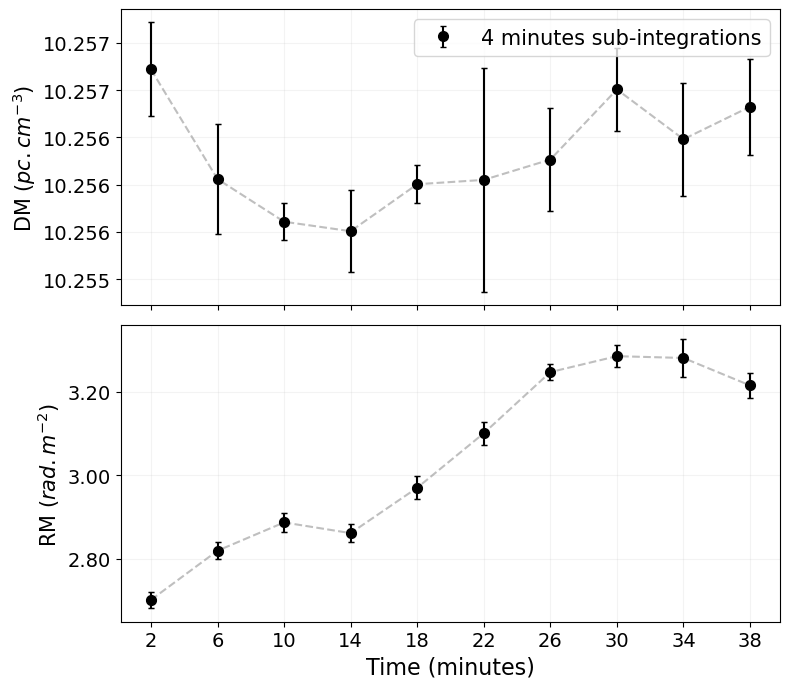

In [5]:
full_rm_lofar_4min = np.genfromtxt("lofar_CME_Iono_4min_rm.txt",dtype=None,unpack=True)
full_dm_lofar_4min = np.genfromtxt("Lofar_CME_4min_DM.txt",dtype=None,unpack=True)

dt = np.linspace(4,40,10)-2  # 4 minutes sub-integrations shifted by 2 minutes to match the center of the segments

fig, ( ax1, ax2) =  plt.subplots(nrows=2,figsize=(8, 7), sharex=True, gridspec_kw={'height_ratios': [40,40]})
fig.subplots_adjust(hspace=0)

data_color = 'black'
data2_color = 'black'
outli = False
ax1.errorbar(dt, full_dm_lofar_4min[2,:], yerr=full_dm_lofar_4min[3,:], fmt='o--', color='grey',alpha=0.5, markersize=7, linewidth=1.5,capsize=2)
ax1.errorbar(dt, full_dm_lofar_4min[2,:], yerr=full_dm_lofar_4min[3,:], fmt='o', label='4 minutes sub-integrations', color='black', markersize=7, linewidth=1.5,capsize=2)

ax1.tick_params(labelbottom=False)

ax1.sharex(ax2)
ax2.errorbar(dt, full_rm_lofar_4min[1,:], yerr=full_rm_lofar_4min[2,:]*10, fmt='o--', color='grey',alpha=0.5, markersize=7, linewidth=1.5,capsize=2)
ax2.errorbar(dt, full_rm_lofar_4min[1,:], yerr=full_rm_lofar_4min[2,:]*10, fmt='o', color='black', markersize=7, linewidth=1.5,capsize=2)

# Remove the x-ticks from the first subplot
#ax1.tick_params(axis='x',labelbottom=False)
ax1.tick_params(axis='y', which='major', labelsize=14)

ax1.legend(fontsize=15)

#ax1.set_ylabel('log-marginal likelihood estimate', fontsize=13)
ax1.set_ylabel(r'DM ($pc.cm^{-3}$)', fontsize=15)

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

ax2.set_ylabel(r'RM $ (rad.m^{-2})$', fontsize=15)
ax2.set_xticks(dt,fontsize=16)


ax1.grid(alpha=0.15)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Grid (uncomment if desired)
ax2.grid(alpha=0.15)
ax2.set_xlabel('Time (minutes)', fontsize=16)
# Save and show the plot
plt.tight_layout()
plt.savefig("dm_rm_4min.pdf", format="pdf", dpi=300,bbox_inches="tight")

plt.show()

DM angle 4 min [10.25519677 10.25519677 10.25519677 10.25519677 10.25519677 10.25519677
 10.25519677 10.25519677 10.25519677 10.25519677]
delta_DM [0.00141319 0.0008329  0.00060746 0.00055723 0.00080588 0.00082879
 0.00093639 0.00130727 0.00104384 0.00121585]


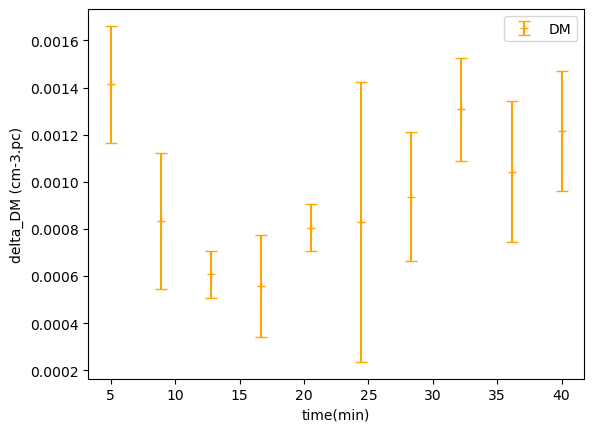

In [8]:
j1022_full_all_dm =j1022_DE_file = np.genfromtxt('/data/ezahraoui/J1022+1001/2024_rmfit/paper_figures/dm_withoutnenufar.txt', dtype=None, 
    unpack=True, 
    usecols=tuple(range(len(open('/data/ezahraoui/J1022+1001/2024_rmfit/paper_figures/dm_withoutnenufar.txt').readline().split()) - 1))
)


new_rm = full_rm_lofar_4min[1,:]
new_err = full_rm_lofar_4min[2,:]

dm = full_dm_lofar_4min[2,:] # DM in cm-3.pc
mjd = full_dm_lofar_4min[1,:] # MJD in days
pre = full_dm_lofar_4min[3,:] # error in DM

angle_4min = np.array(full_dm_lofar_4min[4,:]) # Solar elongation angle in degrees


A_sw = 13.412970727061886
dm_0 = 10.25342067882425
dm_1 = -7.797037299662749e-07
dm_2 = 1.3727619638275386e-09
dm_3 = 2.5502328525705877e-11


base_dm = DM_SW(A_sw,angle_4min*np.pi/180) + dm_0

base_dm = DM_SW(A_sw,angle_4min*np.pi/180)+ dm_0 # plus DM0 fitted from MCMC

#print("base DM for full_dm_lofar_4min :", base_dm)

#delta_DM = dm - base_dm
delta_DM = dm - base_dm

print('DM angle 4 min', DM_SW(A_sw,angle_4min*np.pi/180) + dm_0)

plt.errorbar(np.linspace(5,40,10),delta_DM,yerr=pre,color='orange',fmt='+',capsize=(4),label='DM')
plt.xlabel('time(min)')
plt.ylabel('delta_DM (cm-3.pc)')
plt.legend()
# plt.show()
print('delta_DM', delta_DM)

pre 1.4015425300000002
post 1.3435178300000001
RM interpolated 1.3726839323654294


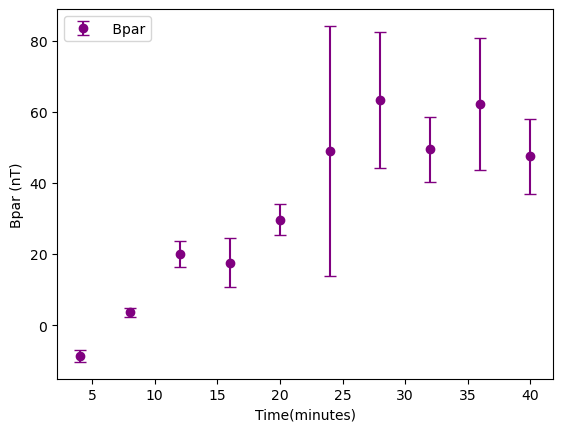

[-8.65929311  3.62758793 19.9710726  17.55177246 29.65531429 48.92446354
 63.24540551 49.42968527 62.19058926 47.49842595] [ 1.67241988  1.29240256  3.60748169  6.95473211  4.3833843  35.22010938
 19.16356755  9.21681216 18.49818456 10.58692833]
[0.00141319 0.0008329  0.00060746 0.00055723 0.00080588 0.00082879
 0.00093639 0.00130727 0.00104384 0.00121585]
[-0.09948974  0.02456444  0.09863168  0.07951523  0.19429676  0.32965963
  0.48148098  0.52534874  0.5277824   0.46951817]


In [9]:
mjd2 = full_rm_lofar_4min[0,:] # MJD of 4 minutes sub-integrations

rm = full_rm_lofar_4min[1,:] # RM of 4 minutes sub-integrations

rm_err = full_rm_lofar_4min[2,:] # RM error of 4 minutes sub-integrations

rm_iono = full_rm_lofar_4min[3,:] # RM ionospheric correction of 4 minutes sub-integrations

lofar_full_obs_rm = np.genfromtxt("Rm_fullobs_lofar_observation.txt",dtype=None,unpack=True) # RM  of observationsfrom LOFAR CME

mjd_background = lofar_full_obs_rm[0,:]
back_rm = lofar_full_obs_rm[1,:]

background_rm_iono = [1.24985747,1.31498217] # Pre and post CME obs RM values for ionospheric correction (Caterina Tiburzi)
pre_day = back_rm[1] - background_rm_iono[0]
post_day = back_rm[3] - background_rm_iono[1]
background_rm_inter = ((post_day-pre_day)/(mjd_background[3]-mjd_background[1]))*(mjd_background[2]-mjd_background[1])+pre_day #Background RM interpolation between pre and post CME obs RM values for ionospheric correction (Caterina Tiburzi)


print("pre",pre_day )
print("post",post_day )


print("RM interpolated",background_rm_inter)


delta_rm_new = (new_rm - rm_iono - background_rm_inter)
rm_new_err = abs(delta_rm_new*np.sqrt((rm_err/rm)**2+(0.08)**2)) # error propagation with 0.08 rad/m^2 as the error of the ionospheric correction 


b_par_new = 1.23*10**-6*(delta_rm_new/delta_DM)/10**4
b_err_new = abs(b_par_new*np.sqrt((full_dm_lofar_4min[3,:]/delta_DM)**2+(rm_new_err/delta_rm_new)**2)) # error propagation for B parallel

plt.errorbar(np.linspace(4,40,10),b_par_new*10**9,yerr=(b_err_new*10**9),color='purple',fmt='o',capsize=(4),label=' Bpar')


#plt.plot( np.linspace(4,40,10),b_golam*1e9,label='Golam Bpar')
plt.xlabel('Time(minutes)')
#plt.xlabel('MJD(day)')
plt.ylabel('Bpar (nT)')
plt.legend()
plt.show()
print(b_par_new*10**9,b_err_new*10**9)
print(delta_DM)
print(delta_rm_new)

In [ ]:
# ------------------------------------------------------------------
# 1. Collect the quantities you want to export
#    (adapt the array you use for error_delta_dm if it has a different name)
error_delta_dm = full_dm_lofar_4min[3, :]         # DM uncertainty
error_rm       = rm_new_err                       # RM uncertainty
error_b_par    = b_err_new                        # B‖ uncertainty

# 2. Stack the columns side-by-side
output = np.column_stack(
    (delta_DM, error_delta_dm,
     delta_rm_new, error_rm,
     b_par_new,  error_b_par)
)

# 3. Write them to disk with a descriptive header
np.savetxt(
    "lofar_cme_Bpar_results.txt",
    output,
    fmt="%.8e",                                   # scientific notation, 8 decimals
    header="delta_DM error_delta_dm delta_rm error_rm B_par error_B_par",
    comments=''                                   # keeps the header uncommented
)

print("Saved results to lofar_cme_BPar_results.txt")
# ------------------------------------------------------------------

Saved results to lofar_cme_BPar_results.txt
